In [303]:
import pandas as pd
from pathlib import Path

import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter
import matplotlib.dates as mdates
import matplotlib.ticker as ticker
import seaborn as sns

In [304]:
path = "/Users/coes3/phd-labs/fraganal/data_source/radar/"

In [335]:
def data_prep(proto_type, path):
    #  function to prep radar data in pandas
    
    files = Path(path).glob(f'{proto_type}Versions*.csv')
    dfs = []
    
    for i in files:
        data = pd.read_csv(i, index_col=None, header=0, parse_dates=['Serie_0 timestamps'])
        data['cc'] = i.name.split('_')[-1].strip('.csv')
        dfs.append(data)
        
    df = pd.concat(dfs, ignore_index=True)
    
    if proto_type == "IP":
        df.rename(columns={"Serie_0 timestamps":"date", "Serie_0  I Pv4":"ipv4", "Serie_0  I Pv6":"ipv6"}, inplace = True)
        
    else:
        df.rename(columns={"Serie_0 timestamps":"date", "Serie_0  T L S 1.3":"tlsv1_3", "Serie_0  T L S 1.2":"tlsv1_2", 
                           "Serie_0  T L S  Q U I C":"tlsvquic", "Serie_0  T L S 1.0":"tlsv1_0", "Serie_0  T L S 1.1":"tlsv1_1"}, inplace = True)
    
    df['date'] = df['date'].dt.strftime('%m-%Y')
    return df
    

In [336]:
df_tls = data_prep('TLS', path)

In [337]:
df_ip = data_prep('IP', path)

In [239]:
def plot_ip_graph(df):
    cc_list = ['CN', 'DE', 'BR', 'IQ', 'IN', 'RW']
    plot_tup = [(0,0), (0,1), (0,2), (1,0), (1,1), (1,2)]
    fig, axs = plt.subplots(2, 3, figsize=(16, 8))
    
    for i in range(len(cc_list)):
        cc = cc_list[i]
        a, b = plot_tup[i]
        
        axs[a, b].bar(df.loc[df['cc'] == cc].date.values, df.loc[df['cc'] == cc].IPv4.values, color='red', label = 'IPv4', bottom=df.loc[df['cc'] == cc].IPv6.values)
        axs[a, b].bar(df.loc[df['cc'] == cc].date.values, df.loc[df['cc'] == cc].IPv6.values, color='green', label = 'IPv6')
        axs[a, b].set_title(cc)

In [242]:
def plot_tls_graph(df):
    cc_list = ['CN', 'DE', 'BR', 'IQ', 'IN', 'RW']
    plot_tup = [(0,0), (0,1), (0,2), (1,0), (1,1), (1,2)]
    fig, axs = plt.subplots(2, 3, figsize=(16, 8))
    
    for i in range(len(cc_list)):
        cc = cc_list[i]
        a, b = plot_tup[i]
        
        axs[a, b].bar(df.loc[df['cc'] == cc].date.values, df.loc[df['cc'] == cc].tlsvquic.values, color='purple', label = 'tlsvquic')
        axs[a, b].bar(df.loc[df['cc'] == cc].date.values, df.loc[df['cc'] == cc].tlsv1_3.values, color='red', label = 'tlsv1_3')
        axs[a, b].bar(df.loc[df['cc'] == cc].date.values, df.loc[df['cc'] == cc].tlsv1_2.values, color='green', label = 'tlsv1_2')
        axs[a, b].bar(df.loc[df['cc'] == cc].date.values, df.loc[df['cc'] == cc].tlsv1_1.values, color='blue', label = 'tlsv1_1')
        axs[a, b].bar(df.loc[df['cc'] == cc].date.values, df.loc[df['cc'] == cc].tlsv1_0.values, color='yellow', label = 'tlsv1_0')
        axs[a, b].set_title(cc)

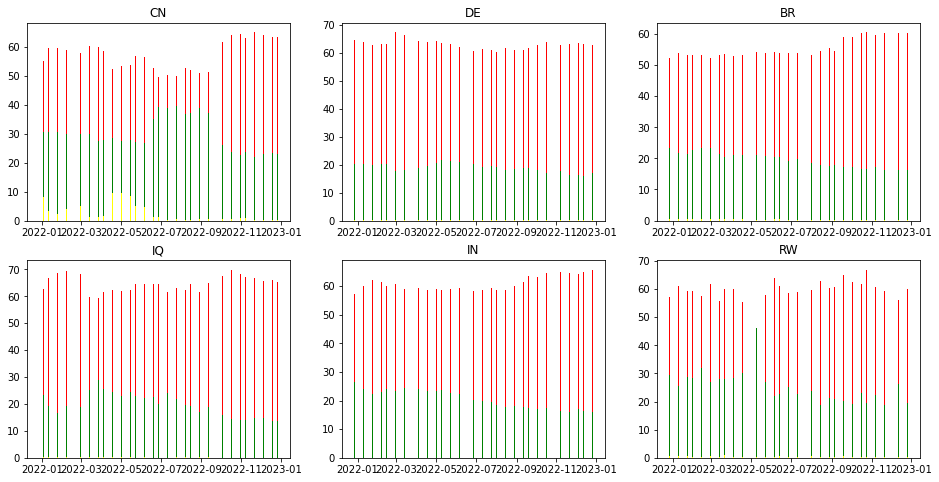

In [243]:
plot_tls_graph(df_tls)

In [455]:
def plot_graph(df):
    
    df2 = pd.melt(df, id_vars = ['date', 'cc'], var_name='version', 
              value_name='pct')
    
    #order = list(df2['version'].unique())
  
    g = sns.FacetGrid(df2, col='cc', hue='version', col_wrap=3, height=4, aspect=2)
    g.map_dataframe(sns.lineplot, 'date', 'pct').add_legend()
    g.set_xticklabels(rotation=45, ha='right')
    

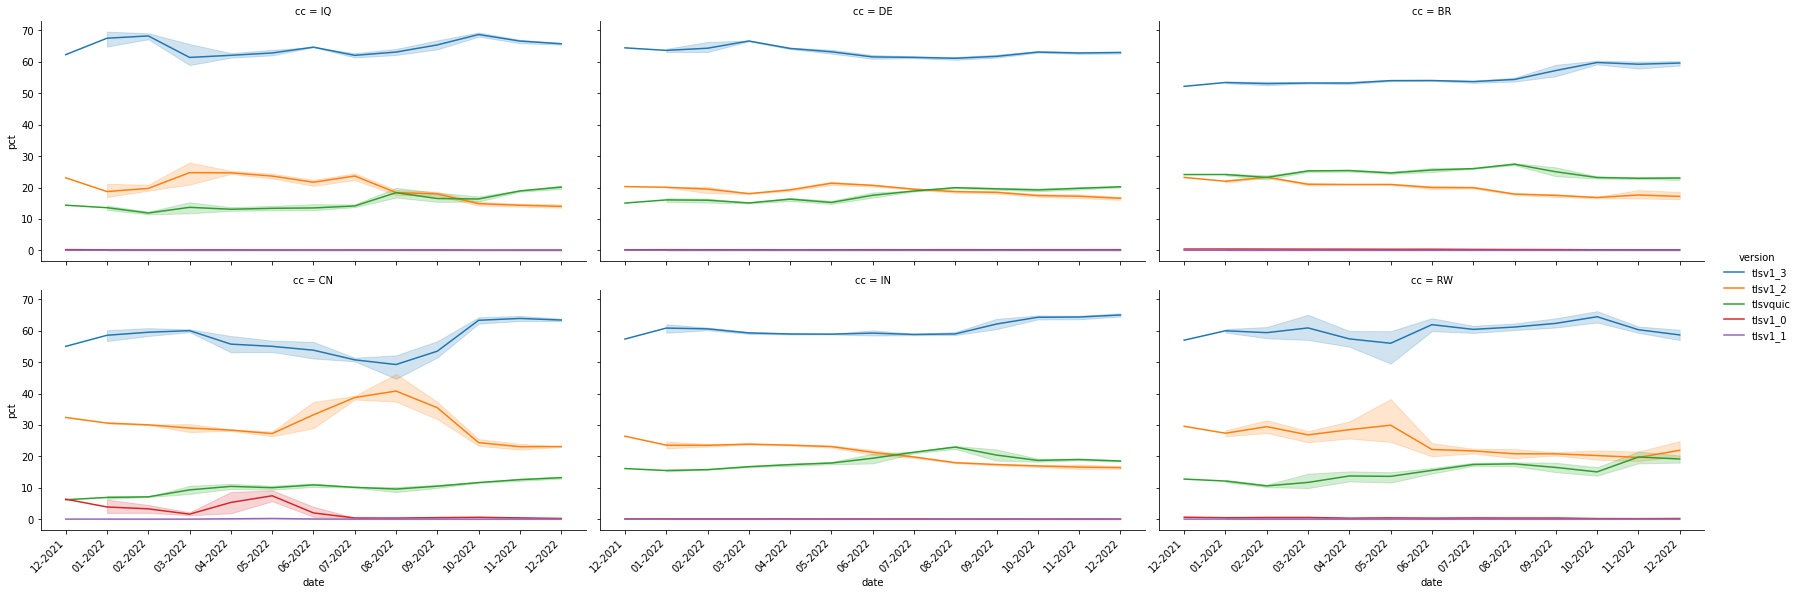

In [456]:
plot_graph(df_tls)